<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Advanced Machine Learning - Project Debrief</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
#pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [2]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

## Import Dataset

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
visa = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EasyVisa.csv') ##  Fill the blank to read the data

In [5]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [6]:
data.head(5) ##  Complete the code to view top 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
data.tail(5) ##  Complete the code to view last 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [8]:
data.shape ##  Complete the code to view dimensions of the data

(25480, 12)

* The dataset has 25480 rows and 12 columns

#### Check the data types of the columns for the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* All are object variables except 'no_of_employees', 'yr_of_estab', 'region_of_employment' whcih are numerical in the data.
* There is no missing data

In [10]:
#data['yr_of_estab'] = pd.to_datetime(data['yr_of_estab'])#, dayFirst = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [12]:
# checking for duplicate values
dup = data.duplicated().sum() ##  Complete the code to check duplicate entries in the data
print(dup)

0


* There i s no duplicaated data

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [13]:
data.describe() ##  Complete the code to print the statistical summary of the data

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


* The average number of employees in the employer's company is 5667
* The average wage paid to similarly employed workers in a specific occupation in the area of intended employment is 74456. The min and max prevailing_Wage is 2 and 319210 with respectevly


#### Fixing the negative values in number of employees columns

In [14]:
#data.loc['_______'].shape ## Complete the code to check negative values in the employee column

negEmp = data.loc[data['no_of_employees'] < 0 ]
negEmp

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [15]:
count_negatives = (data['no_of_employees'] < 0).sum()
print(count_negatives)

33


In [16]:
# taking the absolute values for number of employees
data["no_of_employees"] = data["no_of_employees"].abs() ## Write the function to convert the values to a positive number

In [17]:
negEmp = data.loc[data['no_of_employees'] < 0 ]
negEmp

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


#### Let's check the count of each unique category in each of the categorical variables

In [18]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [19]:
# checking the number of unique values
data["case_id"].unique()#'_______' ## Complete the code to check unique values in the mentioned column

array(['EZYV01', 'EZYV02', 'EZYV03', ..., 'EZYV25478', 'EZYV25479',
       'EZYV25480'], dtype=object)

In [20]:
data.drop(["case_id"], axis=1, inplace=True) ## Complete the code to drop 'case_id' column from the data

In [21]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Univariate Analysis

In [22]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

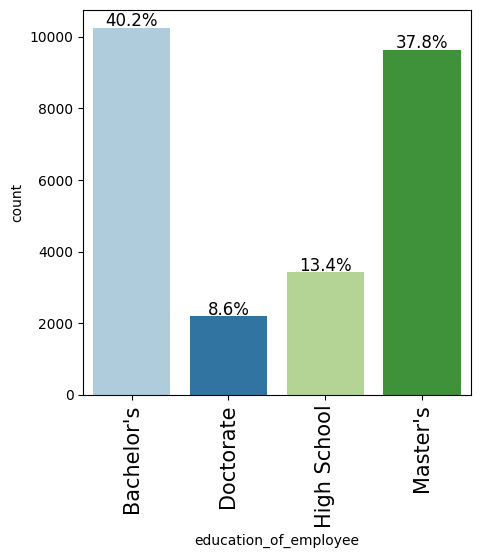

In [24]:
labeled_barplot(data, "education_of_employee", perc=True)

- The higher number of applicants are Bachelor's and Master's in the data; and small applicant of Doctorate's

#### Observations on region of employment

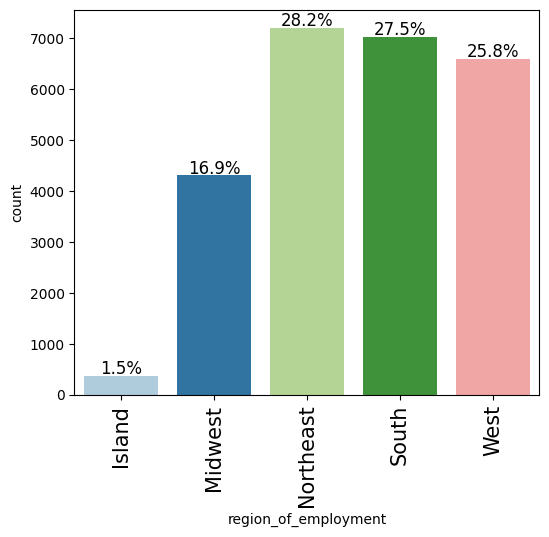

In [25]:
labeled_barplot(data, "region_of_employment", perc=True)  ## Complete the code to create labeled_barplot for region of employment

- Most foreign worker's intended to work in Northeast, South and West region of the US.

#### Observations on job experience

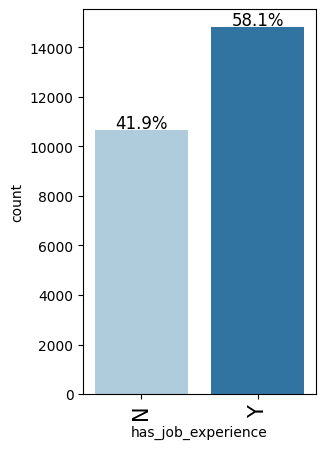

In [26]:
labeled_barplot(data, "has_job_experience", perc=True) ## Complete the code to create labeled_barplot for job experience

- 58% of employee has job experience

#### Observations on case status

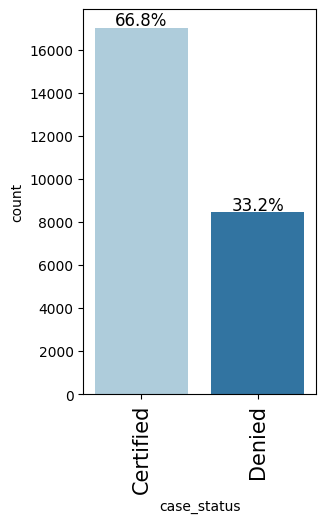

In [27]:
labeled_barplot(data, "case_status", perc=True) ## Complete the code to create labeled_barplot for case status

- 67 % of applicant's Visa was certified and 33 % denied

### Bivariate Analysis

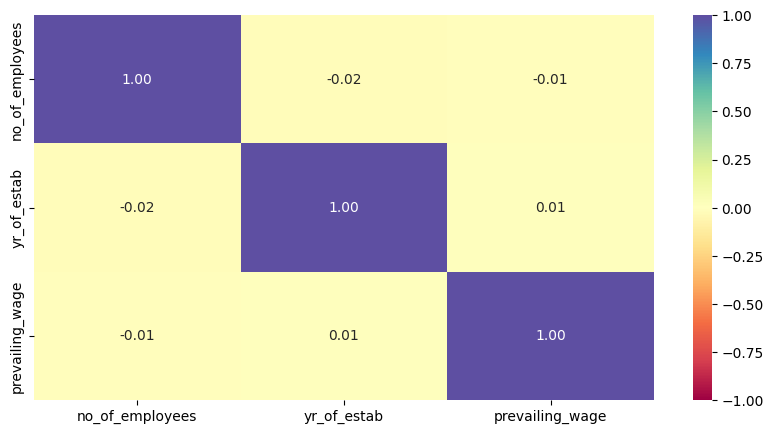

In [28]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## Complete the code to find the correlation between the variables
plt.show()

- All relationships are weak
- no_of_employees has neagative weak relationship with prevailing_wage

**Creating functions that will help us with further analysis.**

In [29]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [30]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


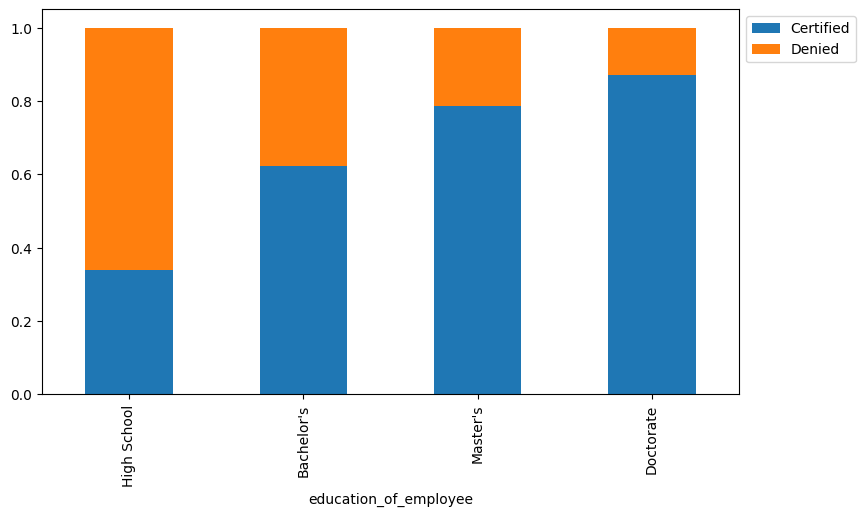

In [31]:
stacked_barplot(data, "education_of_employee", "case_status")

- Doctorate's have high chance of certified for visa and High school's have high chance of denied

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

region_of_employment

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


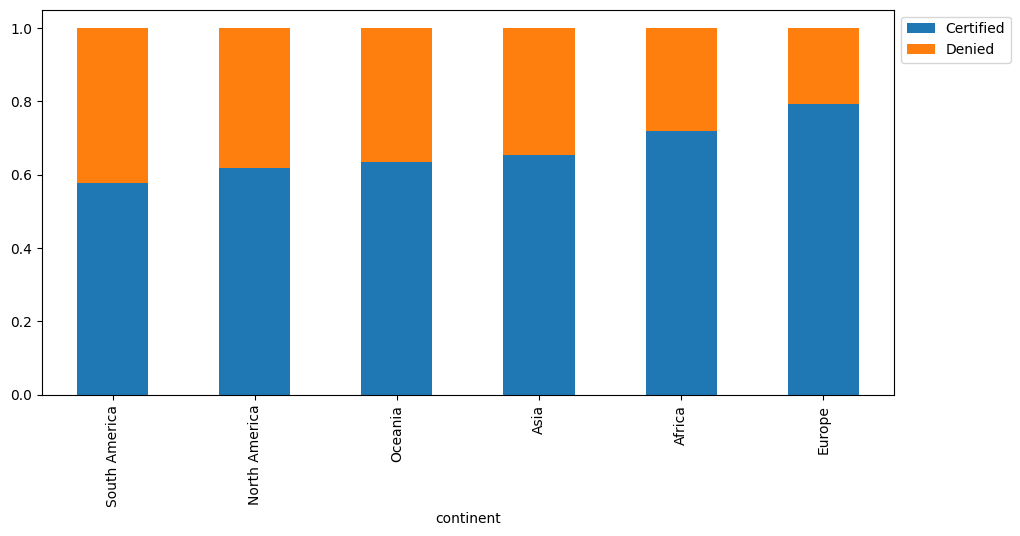

In [32]:
stacked_barplot(data, "continent", "case_status") ## Complete the code to plot stacked barplot for region of continent and case status

- It's kind of uniformally distributed

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


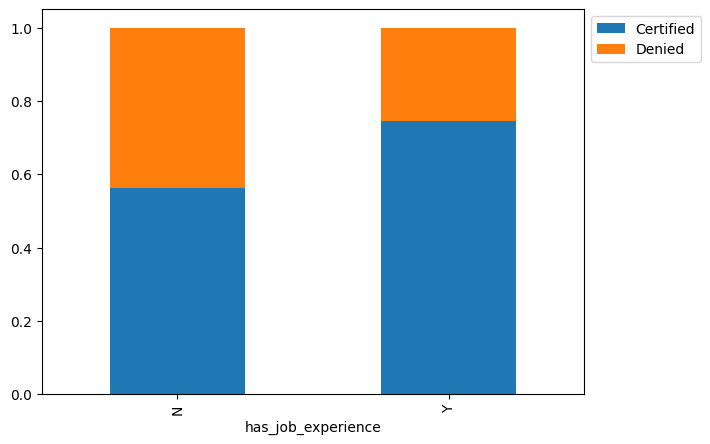

In [33]:
stacked_barplot(data, "has_job_experience", "case_status") ## Complete the code to plot stacked barplot for region of case_status and has_job_experience

- The applicant who have work experince have high probablity of being certified for visa

#### Checking if the prevailing wage is similar across all the regions of the US

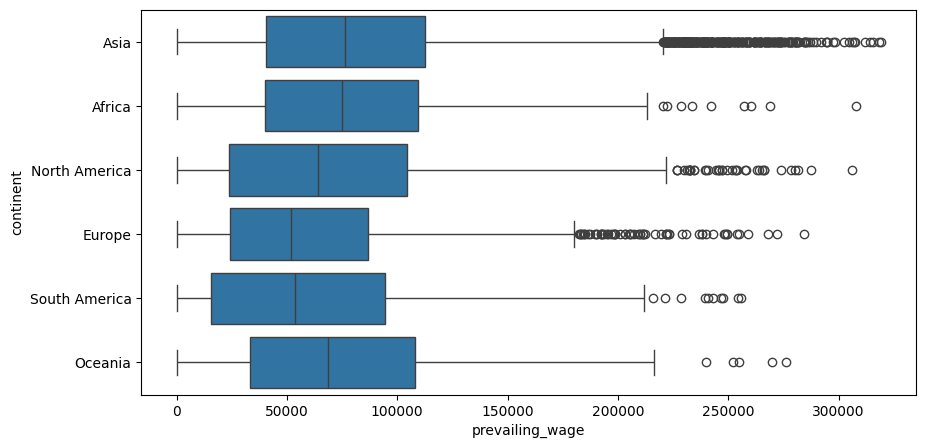

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, y = 'continent', x = 'prevailing_wage')           #'_______' ## Complete the code to create boxplot for region of employment and prevailing wage
plt.show()

- There high outliers but the average of prevailing wage is around 75,000 in all contienets

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

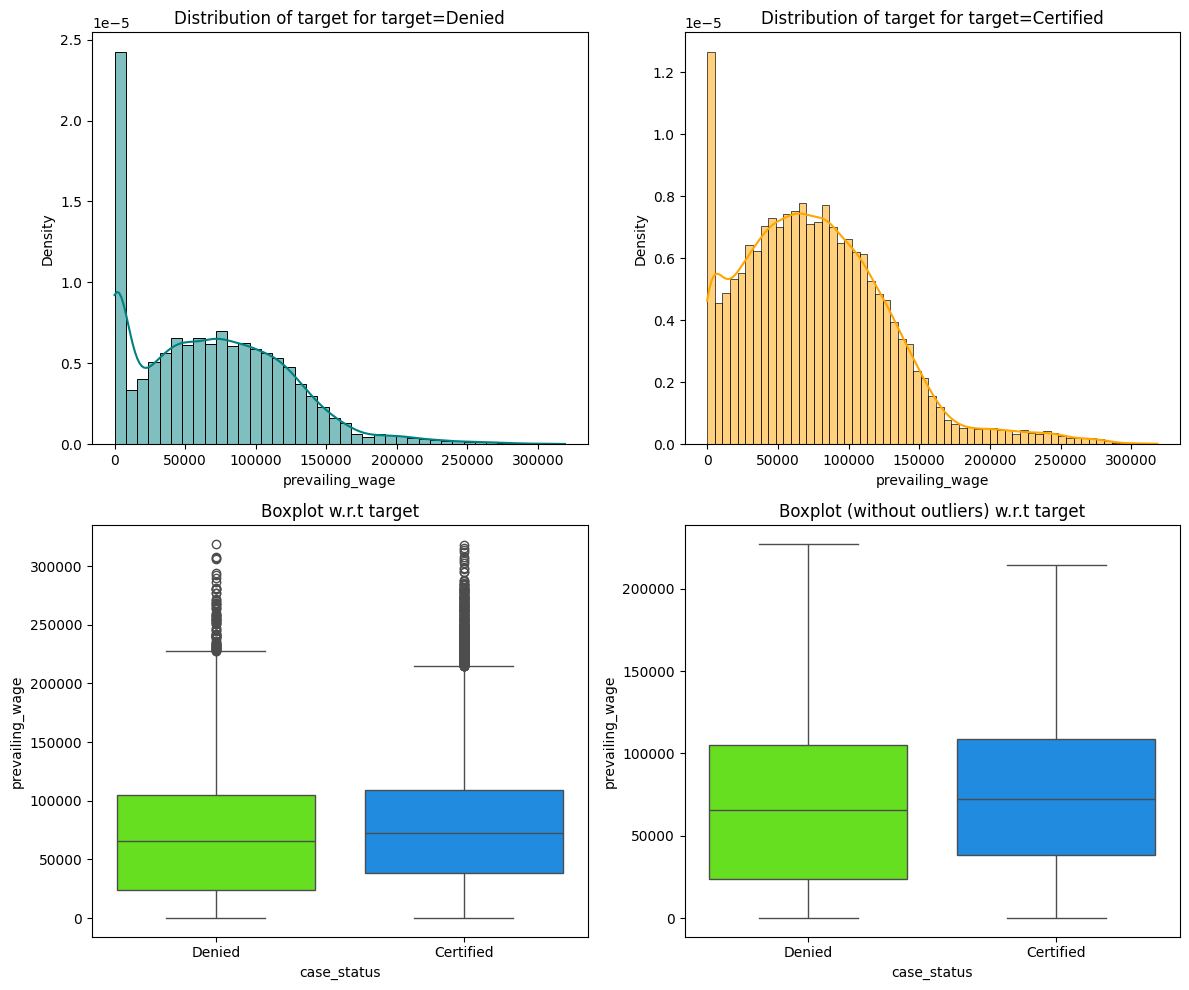

In [35]:
distribution_plot_wrt_target( data, 'prevailing_wage', 'case_status') ## Complete the code to find distribution of prevailing wage and case status

- High median prevailing_wage tends to certified

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


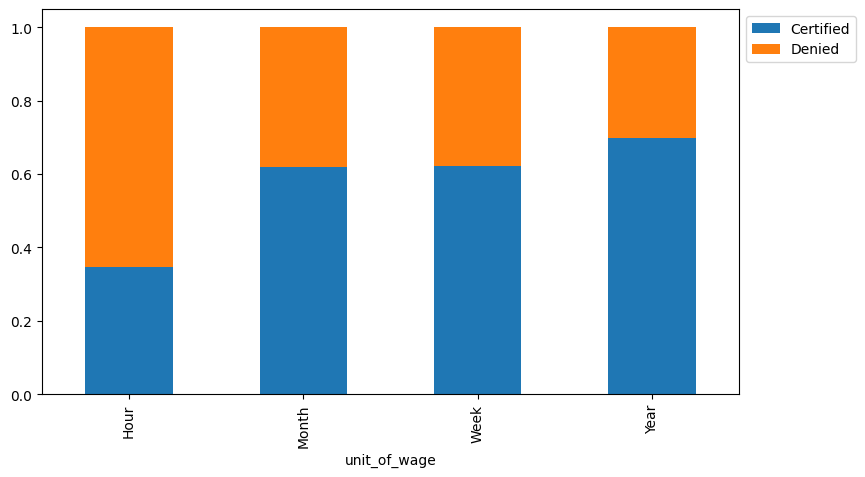

In [36]:
stacked_barplot(data, "unit_of_wage", "case_status") ## Complete the code to plot stacked barplot for unit of wage and case status

- Year unit or annual of wage has high chance of certified
- Hourly unit of wage has high chance of denied when compared with others

## Data Pre-processing

### Outlier Check

- Let's check for outliers in the data.

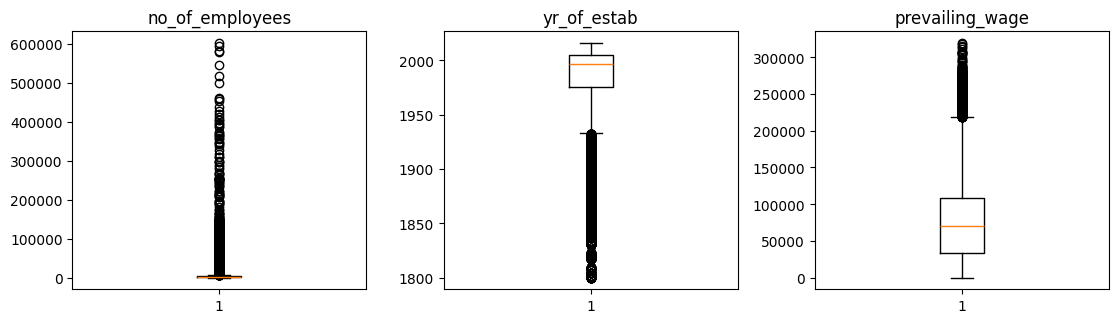

In [37]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There is high continous outliers and not treating them

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [38]:

for feature in data.columns:
  if data[feature].dtype == 'object':
    data[feature] = pd.Categorical(data[feature])
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [39]:
 data.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [40]:
columnsCat = ['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training',
       'region_of_employment', 'unit_of_wage',
       'full_time_position']
columnsCat

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position']

In [41]:
data = pd.get_dummies(data, columns = columnsCat)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   no_of_employees                    25480 non-null  int64   
 1   yr_of_estab                        25480 non-null  int64   
 2   prevailing_wage                    25480 non-null  float64 
 3   case_status                        25480 non-null  category
 4   continent_Africa                   25480 non-null  bool    
 5   continent_Asia                     25480 non-null  bool    
 6   continent_Europe                   25480 non-null  bool    
 7   continent_North America            25480 non-null  bool    
 8   continent_Oceania                  25480 non-null  bool    
 9   continent_South America            25480 non-null  bool    
 10  education_of_employee_Bachelor's   25480 non-null  bool    
 11  education_of_employee_Doctorate    25480 

In [43]:
# Convert all boolean columns to 0 and 1 in the entire dataset
data = data.astype({col: int for col in data.select_dtypes(include=['bool']).columns})


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   no_of_employees                    25480 non-null  int64   
 1   yr_of_estab                        25480 non-null  int64   
 2   prevailing_wage                    25480 non-null  float64 
 3   case_status                        25480 non-null  category
 4   continent_Africa                   25480 non-null  int64   
 5   continent_Asia                     25480 non-null  int64   
 6   continent_Europe                   25480 non-null  int64   
 7   continent_North America            25480 non-null  int64   
 8   continent_Oceania                  25480 non-null  int64   
 9   continent_South America            25480 non-null  int64   
 10  education_of_employee_Bachelor's   25480 non-null  int64   
 11  education_of_employee_Doctorate    25480 

In [45]:
data.head()

,no_of_employees,yr_of_estab,prevailing_wage,case_status,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_N,has_job_experience_Y,requires_job_training_N,requires_job_training_Y,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_N,full_time_position_Y
0,14513,2007,592.2029,Denied,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1
1,2412,2002,83425.6500,Certified,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1
2,44444,2008,122996.8600,Denied,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,98,1897,83434.0300,Denied,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1
4,1082,2005,149907.3900,Certified,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1


In [46]:
data.shape

(25480, 29)

In [47]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop('case_status', axis = 1) ## Complete the code to drop case status from the data
y = data["case_status"]


#X = pd._______  ## Complete the code to create dummies for X

# Complete the code to split the dataset into train and valid with a ratio of 7:3
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

# # Complete the code to split the dataset into valid and test with a ratio of 9:1
X_val,X_test,y_val,y_test = train_test_split(
    X_val,y_val,test_size=0.10 ,random_state=1,stratify=y_val
)


In [48]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 28)
Shape of Validation set :  (6879, 28)
Shape of test set :  (765, 28)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in validation set:
case_status
1    0.66783
0    0.33217
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667974
0    0.332026
Name: proportion, dtype: float64


- Equally distribution of target classes on train, validation and test data sets.

## Model Building

### Model Evaluation Criterion

Provide some reasoning for choosing the metric here : ______

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [49]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [50]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [51]:
scorer = metrics.make_scorer(metrics.f1_score) ## Complete the code to define the metric

## Possible metrics are [recall_score,f1_score,accuracy_score,precision_score]
## For example, metrics.precision_score

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [52]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest",RandomForestClassifier(random_state=1))) ## Complete the code to add Random Forest Classifier with random_state of 1.
models.append(("GBM", GradientBoostingClassifier(random_state=1))) ## Complete the code to add Gradient Boosting Classifier with random_state of 1.
models.append(("Adaboost", AdaBoostClassifier(random_state=1))) ## Complete the code to add AdaBoost Classifier with random_state of 1.
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1))) ## Complete the code to add Decision Tree Classifier with random_state of 1.

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Complete the code to set the number of splits.
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train) ## Complete the code to fit the model on X_train and y_train
    scores = f1_score(y_val, model.predict(X_val)) ## Complete the code to define the metric function name.
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.7751355822729973
Random forest: 0.8027641133940779
GBM: 0.8234732821021398
Adaboost: 0.8185173072498995
Xgboost: 0.8072538589579901
dtree: 0.7453632164356845

Validation Performance:

Bagging: 0.776324395029431
Random forest: 0.796940486169321
GBM: 0.8208210247529796
Adaboost: 0.8154540893125941
Xgboost: 0.8037151702786378
dtree: 0.7442727173079031


- GBM and Adaboost has higher f1_score and its also generalized the data (because of small difference between training and validation metric score).

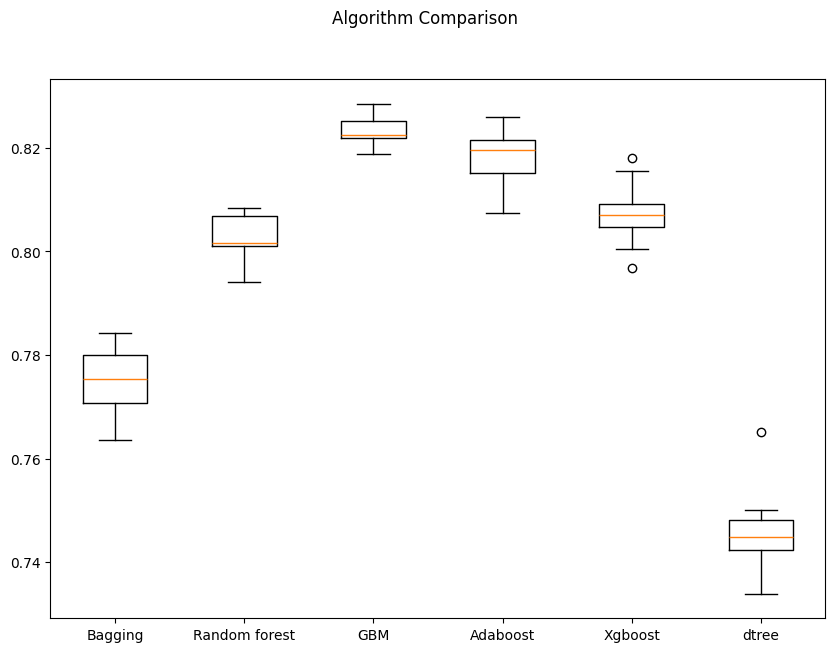

In [53]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- Still the same GBM and Adaboost has higher f1_score but GBM is better by its having low variablity relatively to Adaboost

### Model Building with oversampled data

In [54]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=0.9, k_neighbors=5, random_state=1) ## Complete the code to set the k-nearest neighbors and sampling strategy
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 11913
Before OverSampling, counts of label '0': 5923 

After OverSampling, counts of label '1': 11913
After OverSampling, counts of label '0': 10721 

After OverSampling, the shape of train_X: (22634, 28)
After OverSampling, the shape of train_y: (22634,) 



In [55]:

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest",RandomForestClassifier(random_state=1))) ## Complete the code to add Random Forest Classifier with random_state of 1.
models.append(("GBM", GradientBoostingClassifier(random_state=1))) ## Complete the code to add Gradient Boosting Classifier with random_state of 1.
models.append(("Adaboost", AdaBoostClassifier(random_state=1))) ## Complete the code to add AdaBoost Classifier with random_state of 1.
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1))) ## Complete the code to add Decision Tree Classifier with random_state of 1.

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  ## Complete the code to set the number of splits
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over,scoring = scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over,y_train_over) ## Complete the code to fit the model on the oversampled data.
    scores = f1_score(y_val, model.predict(X_val)) ## Complete the code to define the metric function name.
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.7769346744984071
Random forest: 0.8003186882284279
GBM: 0.8144043875604581
Adaboost: 0.8006149070760185
Xgboost: 0.8069915479176621
dtree: 0.7427671641559935

Validation Performance:

Bagging: 0.7683714817654145
Random forest: 0.7959485123443765
GBM: 0.8123490496692218
Adaboost: 0.8046049188906331
Xgboost: 0.806592039800995
dtree: 0.7429696903381114


- GBM, Xgboost and Adaboost has higher f1_score and its also generalized the data (because of small difference between training and validation metric score).

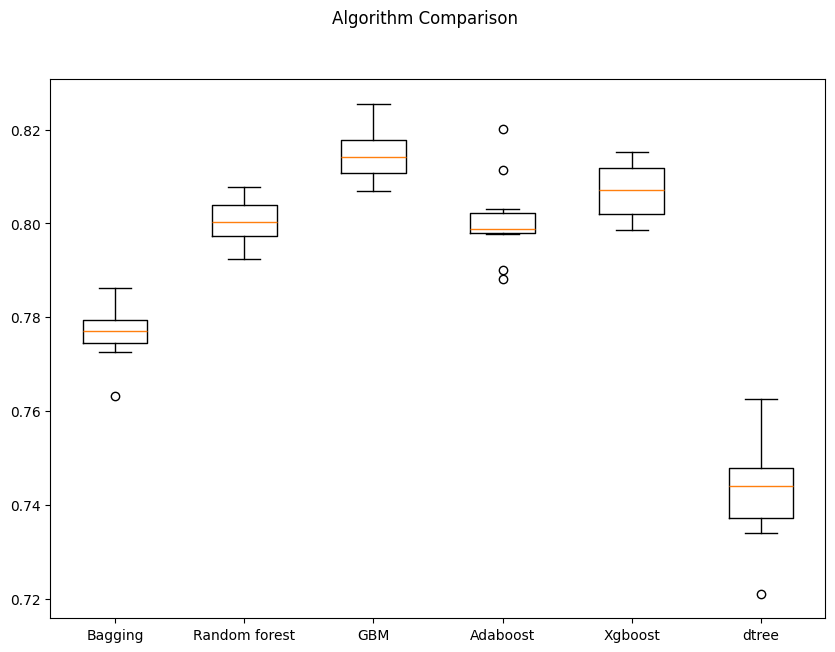

In [56]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- Little difference on here GBM and xgboost has higher f1_score; and Adaboost looks like having low variablity means better stablity but with outliers.
- dtree and xgboost have high variablity

### Model Building with undersampled data

In [57]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 11913
Before UnderSampling, counts of label '0': 5923 

After UnderSampling, counts of label '1': 5923
After UnderSampling, counts of label '0': 5923 

After UnderSampling, the shape of train_X: (11846, 28)
After UnderSampling, the shape of train_y: (11846,) 



In [58]:

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest",RandomForestClassifier(random_state=1))) ## Complete the code to add Random Forest Classifier with random_state of 1.
models.append(("GBM", GradientBoostingClassifier(random_state=1))) ## Complete the code to add Gradient Boosting Classifier with random_state of 1.
models.append(("Adaboost", AdaBoostClassifier(random_state=1))) ## Complete the code to add AdaBoost Classifier with random_state of 1.
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1))) ## Complete the code to add Decision Tree Classifier with random_state of 1.

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  ## Complete the code to set the number of splits
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un,scoring = scorer, cv=kfold,n_jobs =-1
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un,y_train_un) ## Complete the code to fit the model on the undersampled data.
    scores = f1_score(y_val, model.predict(X_val)) ## Complete the code to define the metric function name.
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.6505125466706869
Random forest: 0.68683027408325
GBM: 0.7107738474444899
Adaboost: 0.69863422454837
Xgboost: 0.6971357921797388
dtree: 0.6186452199435275

Validation Performance:

Bagging: 0.6899975179945396
Random forest: 0.7343638525564804
GBM: 0.7604020570359982
Adaboost: 0.7630004601932812
Xgboost: 0.7457906511244554
dtree: 0.6814318209026697


- Still same GBM and Adaboost has higher f1_score but its score is less than 77% which is low when compared to others model.

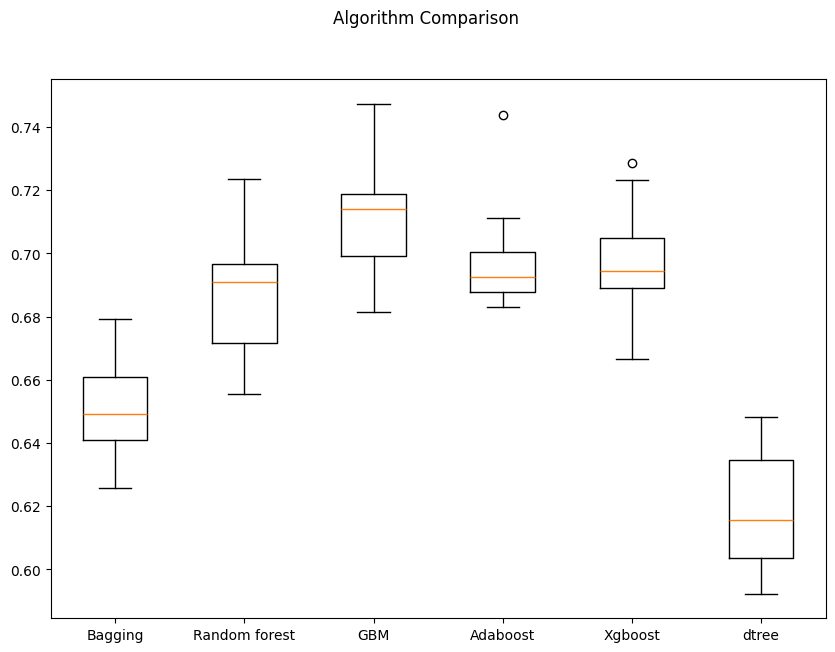

In [59]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- It shows GBM has highest score and high variablity

## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

In [60]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10), ## Complete the code to set the number of estimators
    "learning_rate": np.arange(0.1, 2,  0.1), ## Complete the code to set the learning rate.
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)  ## Complete the code to set the cv parameter

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(60), 'learning_rate': np.float64(0.6), 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8126060230184404:
CPU times: user 7.37 s, sys: 4.31 s, total: 11.7 s
Wall time: 6min 9s


In [82]:
## Complete the code to set the best parameters.
tuned_ada = AdaBoostClassifier(
    n_estimators= 60, learning_rate= 0.6, estimator= DecisionTreeClassifier(max_depth=2, random_state=1)
)

tuned_ada.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.6, n_estimators=60)

In [83]:
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.793894,0.847561,0.779932,0.812342


In [84]:
## Complete the code to check the model performance for validation data.
ada_val_perf = model_performance_classification_sklearn(tuned_ada,X_val,y_val)
ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.735717,0.846321,0.7776,0.810507


- Better f1_score on validation dataset; also better performance on Recalls too

### Tuning Random forest using undersampled data

In [64]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250], ## Complete the code to set the number of estimators.
    "min_samples_leaf": np.arange(5, 10), ## Complete the code to set the minimum number of samples in the leaf node.
    "max_features": [np.arange(0.2, 0.7, 0.1),'sqrt'], ## Complete the code to set the maximum number of features.
    "max_samples": np.arange(0.3, 0.7, 0.1)} ## Complete the code to set the maximum number of samples.


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1) ## Complete the code to set the cv parameter

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'min_samples_leaf': np.int64(7), 'max_samples': np.float64(0.5), 'max_features': 'sqrt'} with CV score=0.7229527627908034:
CPU times: user 4.76 s, sys: 572 ms, total: 5.33 s
Wall time: 2min 58s


In [85]:
# Complete the code to define the best model
tuned_rf2 = RandomForestClassifier(
    max_features= 'sqrt',
    random_state= 1,
    max_samples= 0.5,
    n_estimators= 200,
    min_samples_leaf= 7,
)

tuned_rf2.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.5, min_samples_leaf=7, n_estimators=200,
                       random_state=1)

In [86]:
rf2_train_perf = model_performance_classification_sklearn(
    tuned_rf2, X_train_un, y_train_un
)
rf2_train_perf

,Accuracy,Recall,Precision,F1
0,0.752997,0.775789,0.741967,0.758501


In [87]:
## Complete the code to print the model performance on the validation data.
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2,X_val,y_val)
rf2_val_perf

,Accuracy,Recall,Precision,F1
0,0.711877,0.7303,0.818692,0.771974


- Better f1_score on validation dataset; also better performance on Precision too but Recall performance is reduced

### Tuning with Gradient boosting with oversampled data

In [68]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

## Complete the code to define the hyper parameters.
param_grid={"n_estimators": [100, 150, 200, 250], "learning_rate": [0.1, 0.2, 0.1], "subsample":[0.8, 0.9, 1], "max_features":[0.7, 0.8, 0.9, 1]}

## Complete the code to set the cv parameter.
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv= 5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 150, 'max_features': 0.9, 'learning_rate': 0.2} with CV score=0.8150777032962987:
CPU times: user 15.3 s, sys: 5.08 s, total: 20.3 s
Wall time: 13min 42s


In [88]:
## Complete the code to define the best model.
tuned_gbm = GradientBoostingClassifier(
    max_features= 0.9,
    random_state=1,
    learning_rate=0.2,
    n_estimators= 150,
    subsample= 1
)

tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.9,
                           n_estimators=150, random_state=1, subsample=1)

In [89]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.813157,0.87308,0.79288,0.831049


In [90]:
## Complete the code to print the model performance on the validation data.
gbm_val_perf = model_performance_classification_sklearn(tuned_gbm,X_val,y_val)
gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.739933,0.857858,0.776246,0.815014


- Good f1_score of 81.5% on validation dataset; also good performance on Recall too

### Tuning XGBoost using oversampled data

In [72]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

## Complete the code to define the hyperparameters
param_grid={'n_estimators':np.arange(10, 100, 20),'scale_pos_weight':[0, 1, 2, 5], 'learning_rate':[0.01, 0.1, 0.2, 0.05], 'gamma':[0, 1, 3], 'subsample':[0.5, 0.7, 0.9, 1]}

## Complete the code to set the cv parameter
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 2, 'n_estimators': np.int64(90), 'learning_rate': 0.2, 'gamma': 3} with CV score=0.8241300483021377:
CPU times: user 6.27 s, sys: 3.64 s, total: 9.91 s
Wall time: 1min 15s


In [91]:
## Complete the code to define the best model
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric='logloss',
    subsample=0.9,
    scale_pos_weight=2,
    n_estimators=90,
    learning_rate=0.2,
    gamma=3,
)

xgb2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=90,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [92]:
xgb2_train_perf = model_performance_classification_sklearn(
    xgb2, X_train_over, y_train_over
)
xgb2_train_perf

,Accuracy,Recall,Precision,F1
0,0.805381,0.965332,0.742319,0.839263


In [93]:
## Complete the code to print the model performance on the validation data.
xgb2_val_perf = model_performance_classification_sklearn(xgb2,X_val,y_val)
xgb2_val_perf

,Accuracy,Recall,Precision,F1
0,0.723216,0.944493,0.724616,0.820072


- Good f1_score on validation dataset; also good performance on Recall but bad performance on Precision metric

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

In [76]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train_perf.T,
        xgb2_train_perf.T,
        ada_train_perf.T,
        rf2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.785897,0.526332,0.743174,0.740925
Recall,0.828003,1.000000,0.931923,0.766503
Precision,0.779085,0.526332,0.689394,0.729200
F1,0.802800,0.689669,0.792519,0.747387


In [77]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm_val_perf.T,
        xgb2_val_perf.T,
        ada_val_perf.T,
        rf2_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.732955,0.667830,0.705480,0.711150
Recall,0.817370,1.000000,0.930344,0.729430
Precision,0.790027,0.667830,0.714716,0.818315
F1,0.803466,0.800837,0.808398,0.771320


- So i will go with XGBoost tuned with oversampled data model coz of its high score on F1_score and Recall

In [94]:
## Complete the code to print the model performance on the test data by the best model.

test = model_performance_classification_sklearn(xgb2, X_test, y_test)
test

,Accuracy,Recall,Precision,F1
0,0.726797,0.953033,0.724702,0.823331


- Good f1_score which is more than 80%

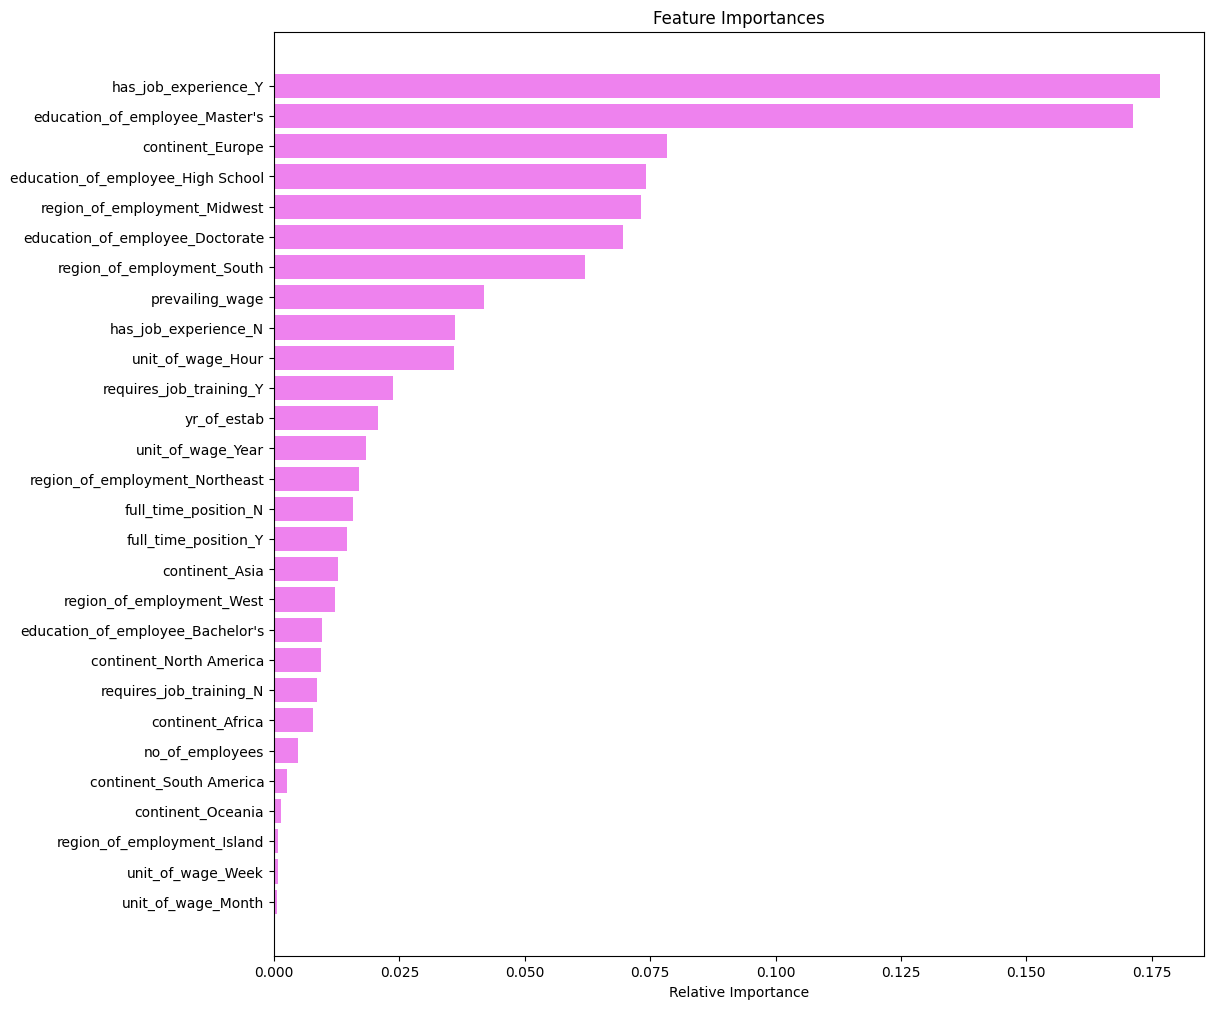

In [79]:
feature_names = X_train.columns
importances = tuned_gbm.feature_importances_ ## Complete the code to print the feature importances from the best model.
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Experience and Education are highly important features.

## Actionable Insights and Recommendations

Profile of Applicants Likely to Have Their Visa Approved

Primary Considerations:

* Education Level: Must have at least a Bachelor’s degree, with a preference for those holding a Master’s or Doctorate.
* Work Experience: Some prior job experience is required.
* Prevailing Wage: The median wage for employees whose visas have been approved is approximately $75,000.

Secondary Considerations:

* Wage Unit: Preference is given to applicants with an annual salary structure rather than an hourly wage.
* Continent of Origin: Historical data suggests that applicants from Europe, Africa, and Asia have a higher likelihood of visa approval.
* Employment Region:
* There is high applications for Northeast, South and West respectively

Profile of Applicants Likely to Have Their Visa Denied

Primary Considerations:

* Education Level: Those who have only completed high school and do not hold a degree.
* Work Experience: No prior job experience.
* Prevailing Wage: The median wage for applicants whose visas have been denied is around $65,000.

Secondary Considerations:

* Wage Unit: Applicants receiving an hourly wage are more likely to face rejection.
* Continent of Origin: Historical data indicates that applicants from South America, North America, and Oceania have a higher chance of visa denial.



<font size=6 color='blue'>Power Ahead</font>
___

In [95]:
!jupyter nbconvert --to html Hana_Mekonnen_EasyVisa_Proj(2).ipynb

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `jupyter nbconvert --to html Copy of Hana_Mekonnen_EasyVisa_Proj(2).ipynb'
